In [16]:
import scanpy as sc
import anndata as ad
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
import seaborn as sns


In [17]:
query1 = sc.read_h5ad("querys/unnorm_sc_C32-24h.h5ad")
query2 = sc.read_h5ad("querys/unnorm_sc_C32-72h.h5ad")

In [18]:
query1_cells = query1.obs.index
query1_cells = query1_cells.str.replace('-1', '')

In [19]:
query2_cells = query2.obs.index
query2_cells = query2_cells.str.replace('-1', '')

In [24]:
query1_cells

Index(['AAACCTGAGTCCGTAT', 'AAACCTGAGTGCGTGA', 'AAACCTGCAACTTGAC',
       'AAACCTGCACATGGGA', 'AAACCTGCACCTGGTG', 'AAACCTGGTGTGACGA',
       'AAACGGGCACCCAGTG', 'AAACGGGCACGTCTCT', 'AAACGGGCATCACCCT',
       'AAACGGGCATCACGAT',
       ...
       'TTTGGTTTCATGCTCC', 'TTTGGTTTCCACGTTC', 'TTTGGTTTCGTATCAG',
       'TTTGTCAAGCAGCGTA', 'TTTGTCAAGTCGCCGT', 'TTTGTCACAGCTCGCA',
       'TTTGTCAGTACTCTCC', 'TTTGTCAGTCCCGACA', 'TTTGTCATCAACACGT',
       'TTTGTCATCGTCTGCT'],
      dtype='object', length=3300)

In [20]:
query2_cells

Index(['AAACCTGCACCCAGTG', 'AAACCTGCAGGTGCCT', 'AAACCTGCATACTACG',
       'AAACCTGGTGAAATCA', 'AAACCTGGTGAGTGAC', 'AAACCTGGTTGTGGAG',
       'AAACCTGTCCGTTGTC', 'AAACGGGAGCCAACAG', 'AAACGGGAGCTTCGCG',
       'AAACGGGAGGCAATTA',
       ...
       'TTTGGTTTCCCACTTG', 'TTTGGTTTCCTGCCAT', 'TTTGTCAAGACCGGAT',
       'TTTGTCAAGGCTAGGT', 'TTTGTCACAATGAAAC', 'TTTGTCAGTCAAACTC',
       'TTTGTCAGTGCAGGTA', 'TTTGTCAGTTCCGGCA', 'TTTGTCATCCGTTGTC',
       'TTTGTCATCTAACTCT'],
      dtype='object', length=4356)

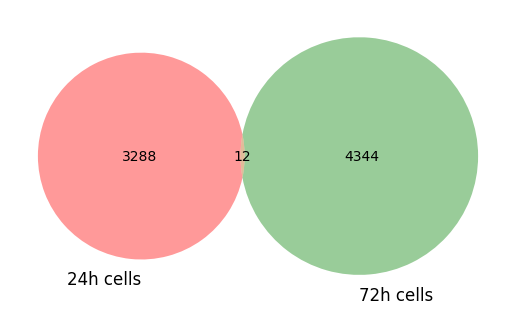

In [21]:
# Create the Venn diagram
venn2([set(query1_cells), set(query2_cells)], set_labels=('24h cells', '72h cells'))

# Display the plot
plt.show()

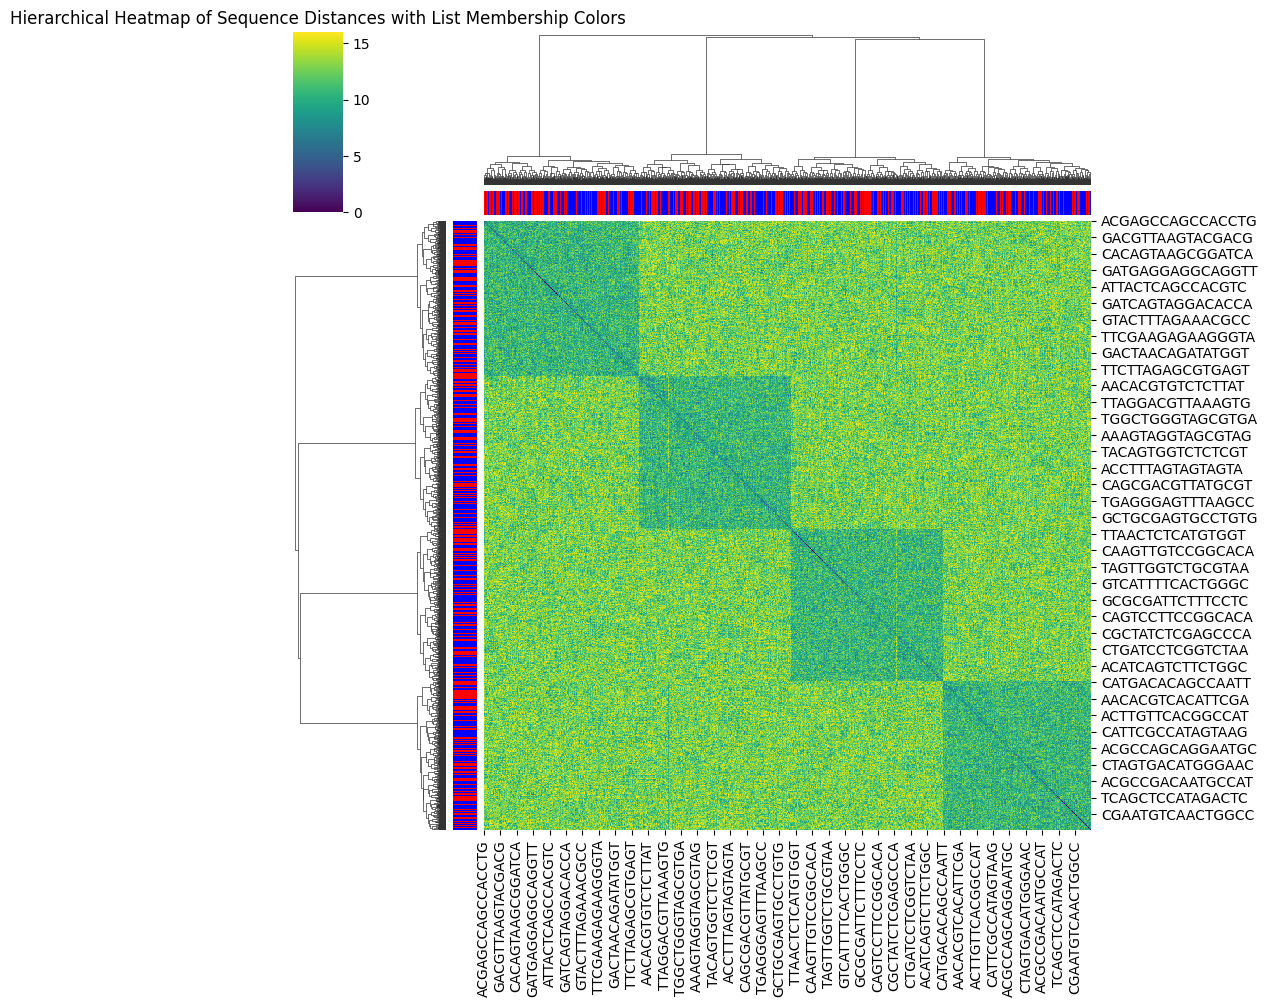

In [26]:
# Sample data: Replace this with your actual sequences
list1 = list(query1_cells)
list2 = list(query2_cells)

# Combine both lists
sequences = list1 + list2

# Calculate pairwise distances using Hamming distance
def hamming_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

distance_matrix = np.zeros((len(sequences), len(sequences)))

for i in range(len(sequences)):
    for j in range(i + 1, len(sequences)):
        distance = hamming_distance(sequences[i], sequences[j])
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance

# Create a DataFrame from the distance matrix
dist_df = pd.DataFrame(distance_matrix, index=sequences, columns=sequences)

# Perform hierarchical clustering
linkage_matrix = linkage(pdist(distance_matrix), method='ward')

# Create a color label array
list1_color = 'red'
list2_color = 'blue'
colors = [list1_color] * len(list1) + [list2_color] * len(list2)

# Plot the hierarchical heatmap
sns.clustermap(
    dist_df, 
    row_linkage=linkage_matrix, 
    col_linkage=linkage_matrix, 
    cmap='viridis',
    row_colors=colors,
    col_colors=colors
)
plt.title('Hierarchical Heatmap of Sequence Distances with List Membership Colors')
plt.show()